In [1]:
import gsw 

from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
%matplotlib inline
from MITgcmutils import rdmds

from netCDF4 import Dataset

import numpy as np

import os 

import pandas as pd

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys

# import my modules
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
#lib_path = os.path.abspath('../BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 
import MetricsPythonTools as mpt 



In [2]:

CGrid = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc' # Smallest volume grid, closed bdy, no canyon.
phiHyd = '/ocean/kramosmu/MITgcm/TracerExperiments/BARKLEY/run02/phiHydGlob.nc'
pout = Dataset(phiHyd)
CGridOut = Dataset(CGrid)

# General input

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 
numTr = 3 # number of tracers in run

rc = CGridOut.variables['RC']

xc = rout.getField(CGrid, 'XC') # x coords tracer cells
yc = rout.getField(CGrid, 'YC') # y coords tracer cells

drF = CGridOut.variables['drF'] # vertical distance between faces
drC = CGridOut.variables['drC'] # vertical distance between centers

hFacC = rout.getField(CGrid, 'HFacC')
MaskC = rout.getMask(CGrid, 'HFacC')
rA = rout.getField(CGrid, 'rA')

bathy = rout.getField(CGrid, 'Depth')



In [18]:
# STATIONS
ys = [262,220,262,227,100,245,245,262,220]
xs = [60,60,180,180,180,160,200,300,300]
stations = ['UpSh','UpSl','CH','CM','CO','UpC','DnC','DnSh','DnSl']

#All experiments in CNT and 3D including no canyon one (run07)
expList = [#'/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run02',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03',
           #'/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run04',
           #'/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run09',
           #'/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run10',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run11',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run14',
           '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04',
           '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05',
           '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06',
           '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07']
           
expNames = [#'CNTDIFF_run02',
           'CNTDIFF_run03',
           #'CNTDIFF_run04',
           #'CNTDIFF_run09',
           #'CNTDIFF_run10',
           'CNTDIFF_run11',
           'CNTDIFF_run12',
           'CNTDIFF_run14',
           '3DDIFF_run04',
           '3DDIFF_run05',
           '3DDIFF_run06',
           '3DDIFF_run07']
           
TrList = [#['Tr1','Tr2','Tr3'], 
          ['Tr1','Tr2','Tr3'], 
          #['Tr1','Tr2','Tr3'],
          #['Tr1','Tr2','Tr3'],
          #['Tr1','Tr2','Tr3'],
          ['Tr1'],
          ['Tr1'],
          ['Tr1','Tr2','Tr3'],
          ['Tr1'],
          ['Tr1'],
          ['Tr1'],
          ['Tr1']]



In [19]:
sns.set()
sns.set_style('whitegrid')
sns.set_context('talk')


In [46]:
def plotTr(ax,z,N,N0,lab,title,xlab,ylab):
    ax.plot(N,z,label=lab)
    ax.plot(N0,z,'--',color='grey')
    ax.set_title(title)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)



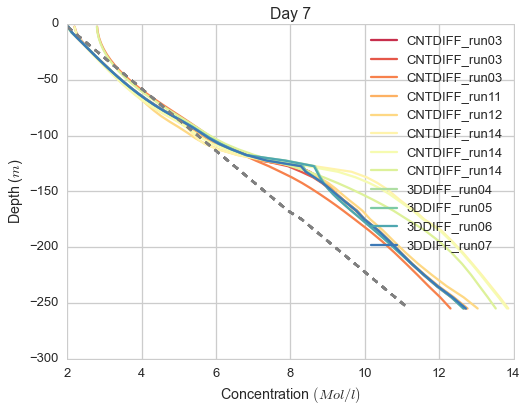

In [47]:
fig1= plt.figure(figsize=(8,6))
ax1 = plt.subplot(1,1,1)
sns.set_palette('Spectral',12)

for runs,ii in zip(expNames,range(len(TrList))):
    for trname in TrList[ii]:
        key = ['Tr_tt14']
        key0 = ['Tr_tt00']
   
        sname = 'DnC'
        filename1 = ('results/metricsDataFrames/Profile_%s_%s_%s.csv' % (trname,runs,sname))
    
        df = pd.read_csv(filename1)
        col = df[key]
        col0 = df[key0]
        plotTr(ax1,rc[:],col,col0,runs,'Day 7','Concentration $(Mol/l)$','Depth ($m$)')


ax1.legend(loc=0)   

plt.show()
   
        
        
        


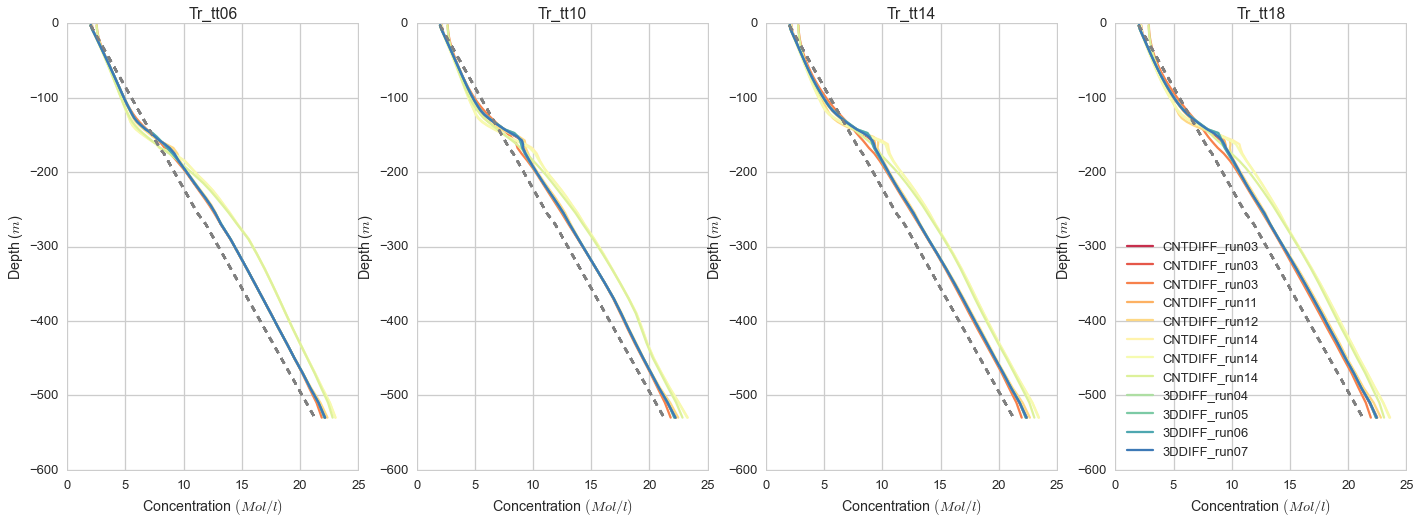

In [54]:
fig1= plt.figure(figsize=(24,8))

ax1 = plt.subplot(1,4,1)
ax2 = plt.subplot(1,4,2)
ax3 = plt.subplot(1,4,3)
ax4 = plt.subplot(1,4,4)

axs = [ax1,ax2,ax3,ax4]

sns.set_palette('Set1',8)

keys = ['Tr_tt06','Tr_tt10','Tr_tt14','Tr_tt18']
key0 = ['Tr_tt00']

for runs,ii in zip(expNames,range(len(TrList))):
    for trname in TrList[ii]:

        for key,a in zip(keys,axs):
    
            sname = 'CM'
            filename1 = ('results/metricsDataFrames/Profile_%s_%s_%s.csv' % (trname,runs,sname))
    
            df = pd.read_csv(filename1)
            col = df[key]
            col0 = df[key0]
            plotTr(a,rc[:],col,col0,runs,key,'Concentration $(Mol/l)$','Depth ($m$)')


ax4.legend(loc=0)   
plt.show()
   
        

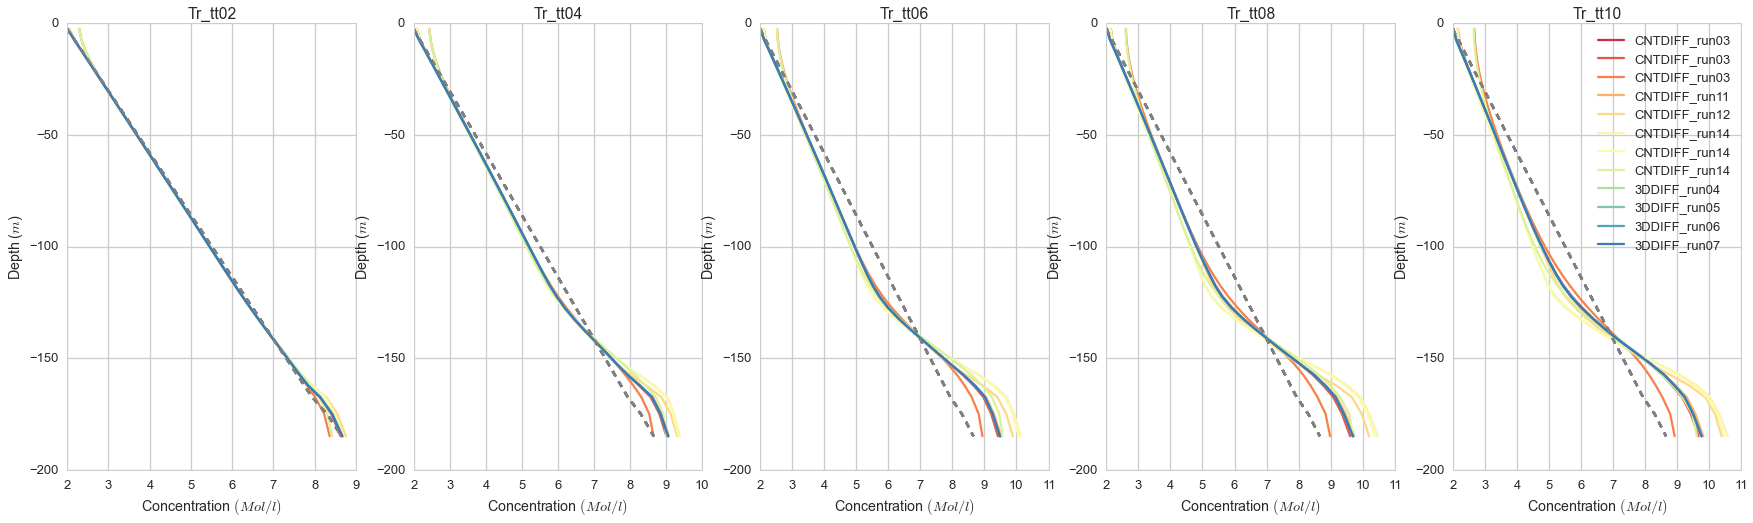

In [53]:
fig1= plt.figure(figsize=(30,8))

ax1 = plt.subplot(1,5,1)
ax2 = plt.subplot(1,5,2)
ax3 = plt.subplot(1,5,3)
ax4 = plt.subplot(1,5,4)
ax5 = plt.subplot(1,5,5)

axs = [ax1,ax2,ax3,ax4,ax5]

sns.set_palette('Spectral',12)

keys = ['Tr_tt02','Tr_tt04','Tr_tt06','Tr_tt08','Tr_tt10']
key0 = ['Tr_tt00']

for runs,ii in zip(expNames,range(len(TrList))):
    for trname in TrList[ii]:

        for key,a in zip(keys,axs):
    
            sname = 'UpSl'
            filename1 = ('results/metricsDataFrames/Profile_%s_%s_%s.csv' % (trname,runs,sname))
    
            df = pd.read_csv(filename1)
            col = df[key]
            col0 = df[key0]
            plotTr(a,rc[:],col,col0,runs,key,'Concentration $(Mol/l)$','Depth ($m$)')


ax5.legend(loc=0)   
plt.show()
   
        

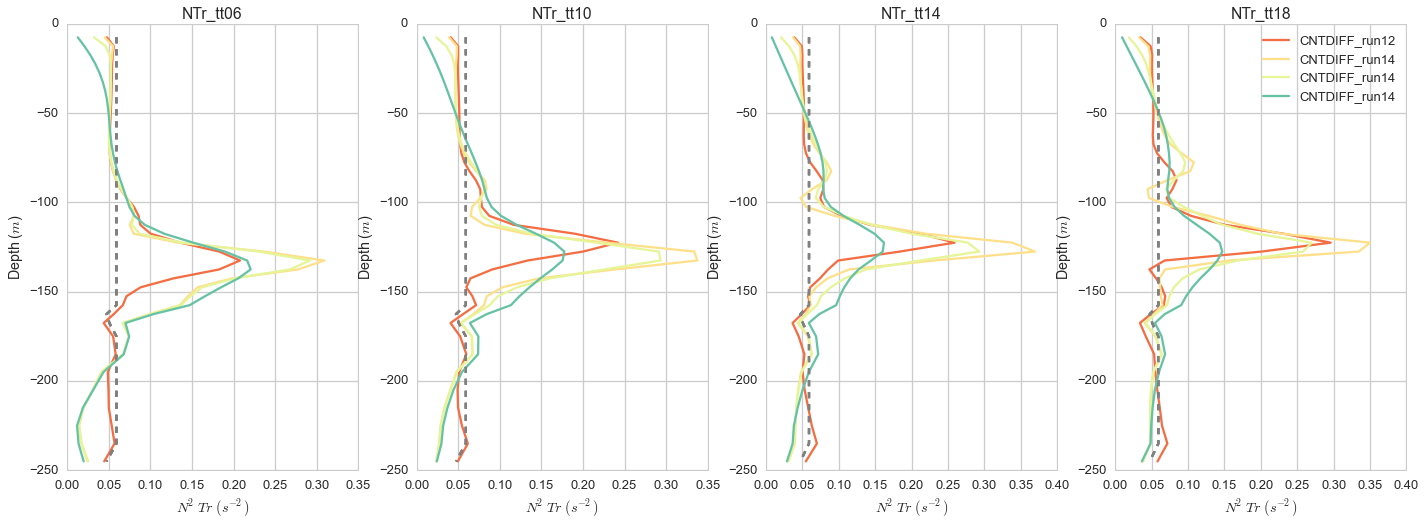

In [78]:
expNames = [#'CNTDIFF_run02',
           #'CNTDIFF_run03',
           #'CNTDIFF_run04',
           #'CNTDIFF_run09',
           #'CNTDIFF_run10',
           #'CNTDIFF_run11',
           'CNTDIFF_run12',
           'CNTDIFF_run14']
           #'3DDIFF_run04',
           #'3DDIFF_run05',
           #'3DDIFF_run06',
           #'3DDIFF_run07']
           
TrList = [#['Tr1','Tr2','Tr3'], 
          #['Tr1','Tr2','Tr3'], 
          #['Tr1','Tr2','Tr3'],
          #['Tr1','Tr2','Tr3'],
          #['Tr1','Tr2','Tr3'],
          ['Tr1'],
          #['Tr1'],
          ['Tr1','Tr2','Tr3']]
          #['Tr1'],
          #['Tr1'],
          #['Tr1'],
          #['Tr1']]


fig1= plt.figure(figsize=(24,8))

ax1 = plt.subplot(1,4,1)
ax2 = plt.subplot(1,4,2)
ax3 = plt.subplot(1,4,3)
ax4 = plt.subplot(1,4,4)

axs = [ax1,ax2,ax3,ax4]

sns.set_palette('Spectral',4)

keys = ['NTr_tt06','NTr_tt10','NTr_tt14','NTr_tt18']
key0 = ['NTr_tt00']

for runs,ii in zip(expNames,range(len(TrList))):
    for trname in TrList[ii]:

        for key,a in zip(keys,axs):
    
            sname = 'DnC'
            filename1 = ('results/metricsDataFrames/N2Tr_%s_%s_%s.csv' % (trname,runs,sname))
    
            df = pd.read_csv(filename1)
            col = df[key]
            col0 = df[key0]
            plotTr(a,rc[1:-1],-col,-col0,runs,key,'$N^2Tr$ $(s^{-2})$','Depth ($m$)')


ax4.legend(loc=0)   
plt.show()
   
       

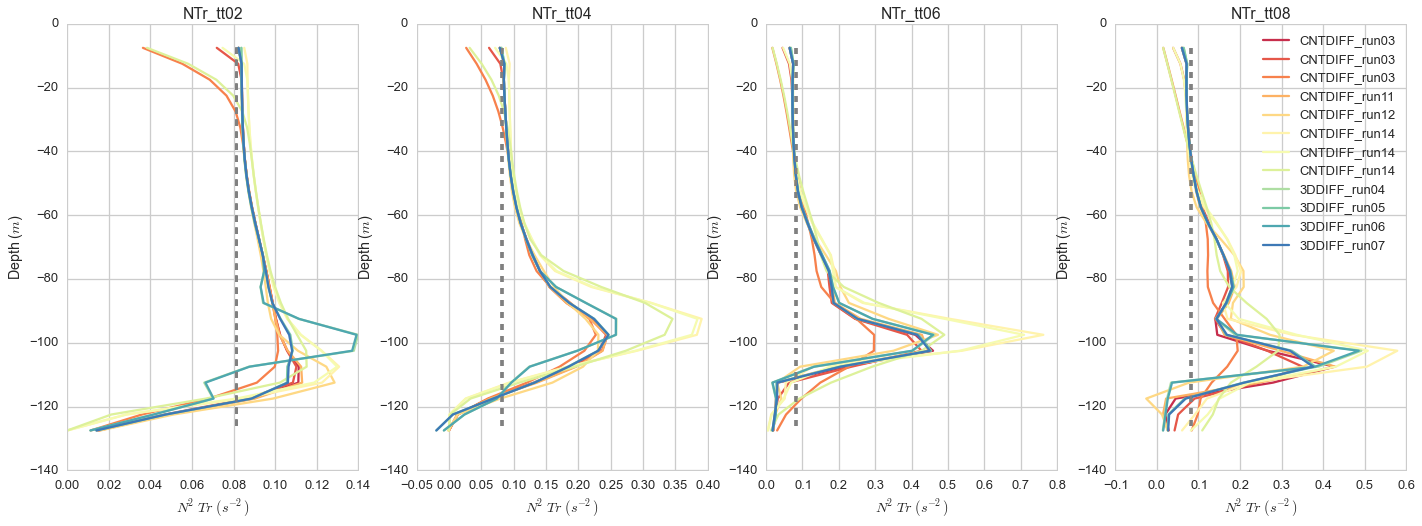

In [70]:
fig1= plt.figure(figsize=(24,8))

ax1 = plt.subplot(1,4,1)
ax2 = plt.subplot(1,4,2)
ax3 = plt.subplot(1,4,3)
ax4 = plt.subplot(1,4,4)

axs = [ax1,ax2,ax3,ax4]

sns.set_palette('Spectral',12)

keys = ['NTr_tt02','NTr_tt04','NTr_tt06','NTr_tt08']
key0 = ['NTr_tt00']

for runs,ii in zip(expNames,range(len(TrList))):
    for trname in TrList[ii]:

        for key,a in zip(keys,axs):
    
            sname = 'CH'
            filename1 = ('results/metricsDataFrames/N2Tr_%s_%s_%s.csv' % (trname,runs,sname))
    
            df = pd.read_csv(filename1)
            col = df[key]
            col0 = df[key0]
            plotTr(a,rc[1:-1],-col,-col0,runs,key,'$N^2Tr$ $(s^{-2})$','Depth ($m$)')


ax4.legend(loc=0)   
plt.show()
   
       